# 2020-12-13

Results below are for commit: https://github.com/gmarkkula/COMMOTIONSFramework/commit/f058cbd15b1244d275afe01f5ce0f5d021ee4d7d
(Rerunning the code below for other commits is not guaranteed to give the same results)

Following up on the previous (Dec 11) diary entry with a rerun of the same simulations as in that entry, after having introduced use of `sc_scenario_helper.get_access_order_accs()` to calculate the accelerations needed for passing in front or behind the other agent. 

The improvements compared to previously is that accelerations to pass second previously were always stopping decelerations, whereas now they can also be decelerations to just pass behind, or accelerations toward free speed if this achieves passing in second. And previously there was no "pass first" acceleration, just a "proceeding" acceleration toward free speed. The current "pass first" acceleration does free speed if that is enough, otherwise the acceleration needed to pass first.

In [3]:
# put root folder of repo PYTHONPATH (https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder)
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))
print(sys.path[-1])

C:\GITHUB\COMMOTIONSFramework


In [4]:
# imports needed to run the simulations
import numpy as np
import commotions
from sc_scenario import get_assumptions_dict, SCSimulation
from sc_scenario_helper import CtrlType

C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:15: UserWarning: Currently removing target_dist > 0 requirement from get_acc_to_be_at_dist_at_time - needed because of current slight incompatibility between definitions of collision course.
  warnings.warn('Currently removing target_dist > 0 requirement from '
C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:78: UserWarning: N_ACTIONS set to no of actions in default params, so will not work if non-default params are set.
  warnings.warn('N_ACTIONS set to no of actions in default params, so will not work if non-default params are set.')


Text from prev entry: *First running a pedestrian crossing scenario with just the base assumptions, for an initial situation such that this just barely has the car passing first. (Increasing the car's initial X position to 45 m makes the pedestrian slide in front.)*

Getting back exactly the same results here, as we should.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:162: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')
C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:856: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(N_PLOTROWS, 1, 1)
C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:861: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, b

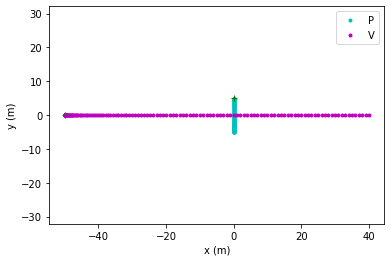

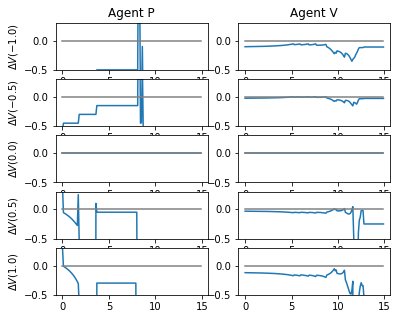

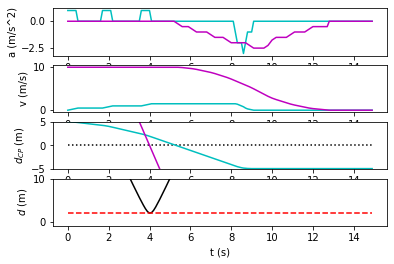

In [5]:
CTRL_TYPES = (CtrlType.SPEED, CtrlType.ACCELERATION) 
INITIAL_POSITIONS = np.array([[0,-5], [40, 0]])
GOALS = np.array([[0, 5], [-50, 0]])
SPEEDS = np.array((0, 10))

optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = False, oEA = False)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        trajs = True, kinem_states = True, surplus_action_vals = True)

Text from prev entry: *Now turning on value based behaviour estimation (`oBEvs` here). This causes the interaction to break down quite a bit, with lots of oscillations in both agents' behaviour. But we can see in the $P_{b|a}$ plots that the vehicle is estimating the acceleration should increase the probability of the pedestrian yielding - but the vehicle still does not do it.*

We get back either the same behaviour or something very similar. We can see slight differences in the estimated expected accelerations, but at least so far they are quite similar to the previous calculations.

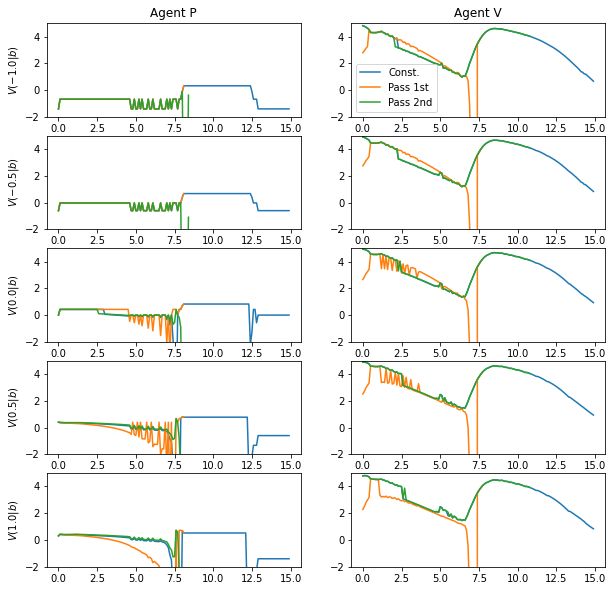

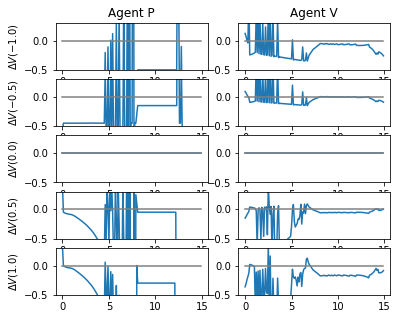

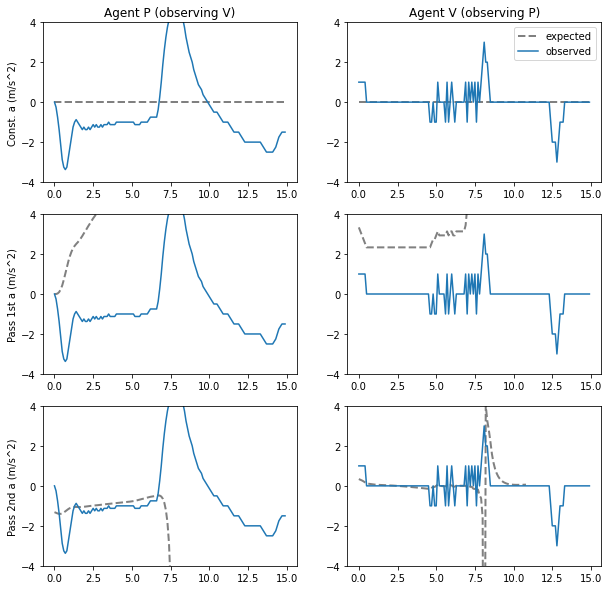

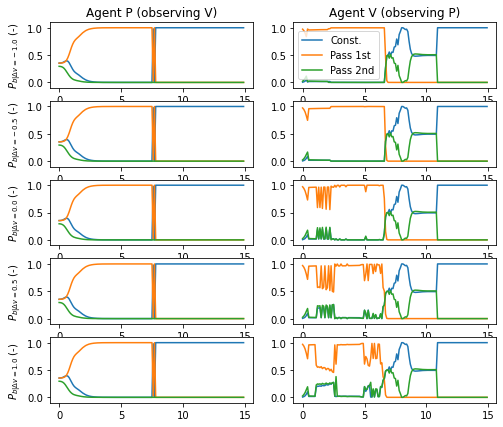

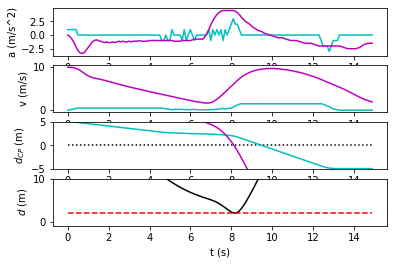

In [7]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = True, oEA = False)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

Text from prev entry: *Now turning on also evidence accumulation. This stabilises things - but now the vehicle no longer thinks that accelerating could affect the pedestrian's behaviour - I am not sure why.*

Here the differences in expected accelerations become more obvious, and now the added evidence accumulation is enough to just barely have the vehicle refrain from the deceleration that happened in the simulation just above - so in a sense this is a "better", more sensible-looking outcome.

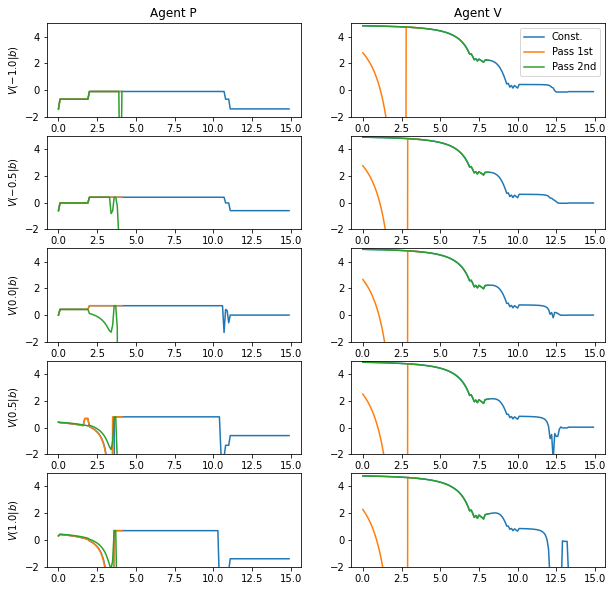

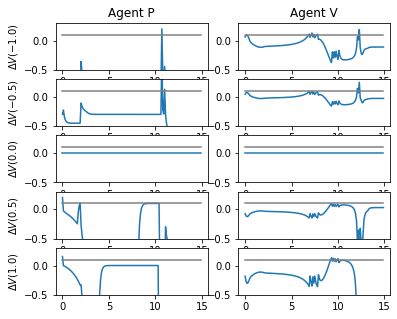

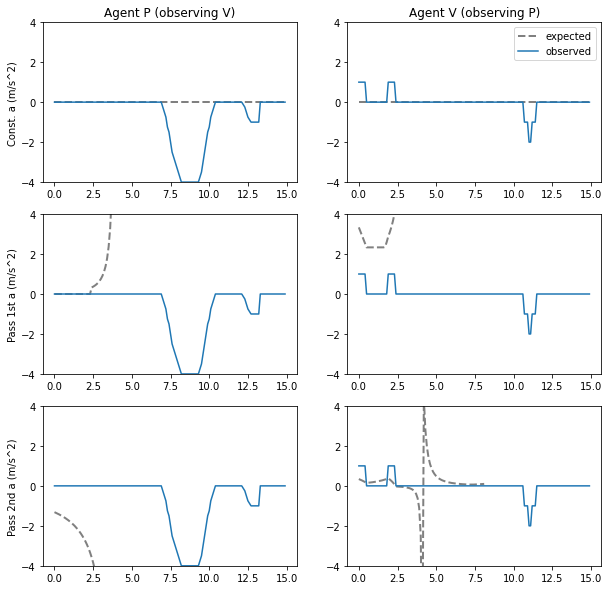

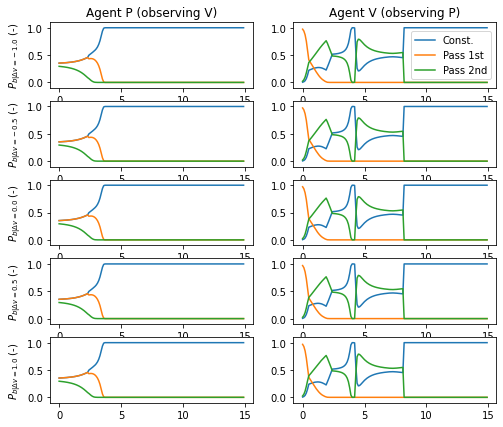

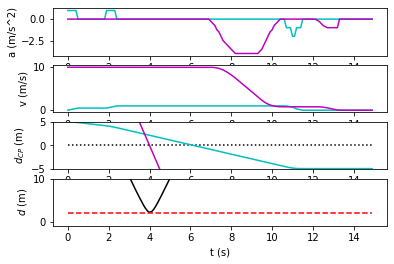

In [8]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = True, oEA = True)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

Text from prev entry: *Now turning off value based behaviour estimation and evidence accumulation, and instead turning on action observation based behaviour estimation (`oBEao`). Again this causes a lot of oscillation and a poor interaction.*

This looks like a case where the new calculations added noticeable improvement. Now the vehicle understands that the pedestrian can be walking slowly forward in order to pass behind the vehicle, so it is less likely to interpret the pedestrian as trying to push in front.

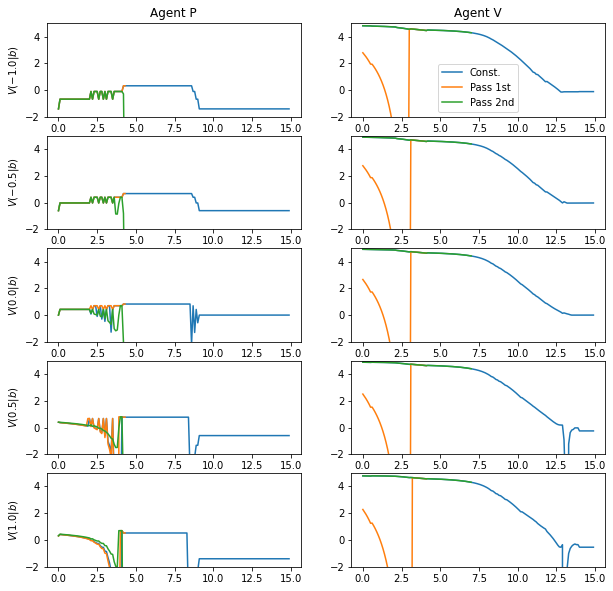

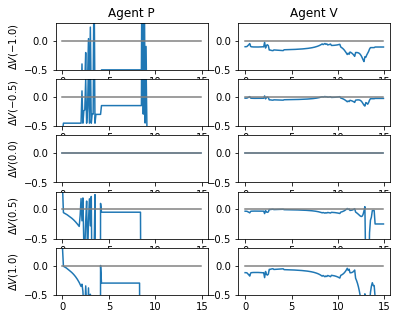

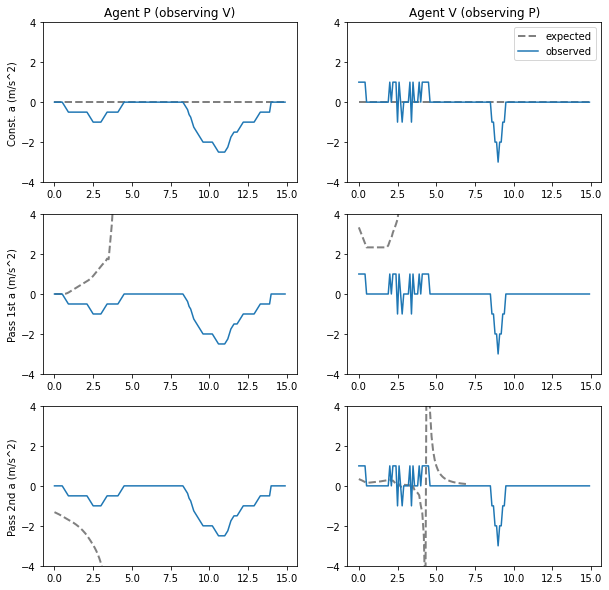

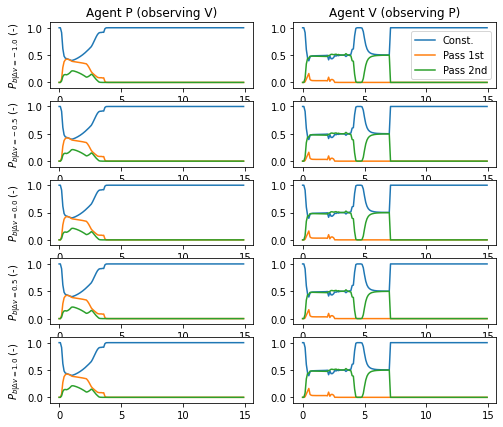

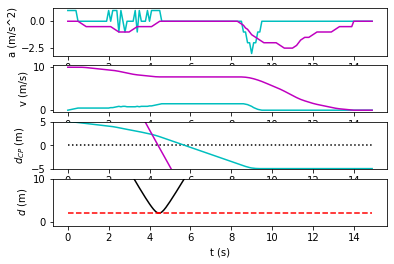

In [9]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = False, oEA = False)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

Text from prev entry: *Adding evidence accumulation into the mix here dampens things a bit, but not much.*

And just like with `oBEvs`, adding in the evidence accumulation, we get back nice behaviour.

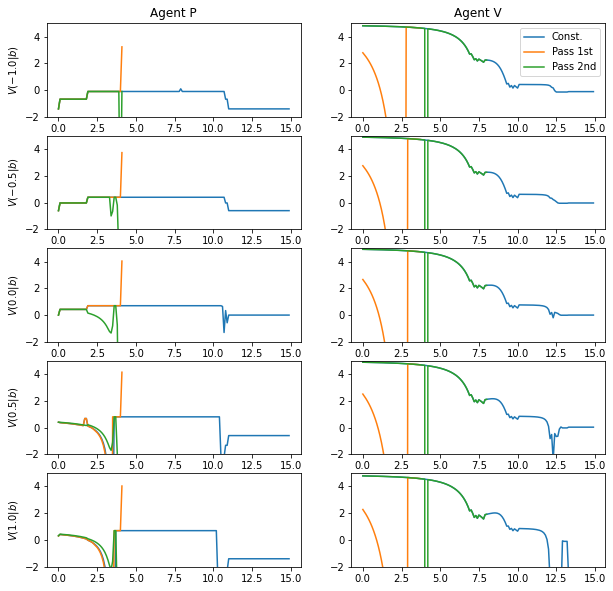

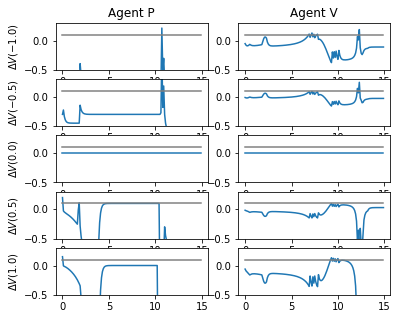

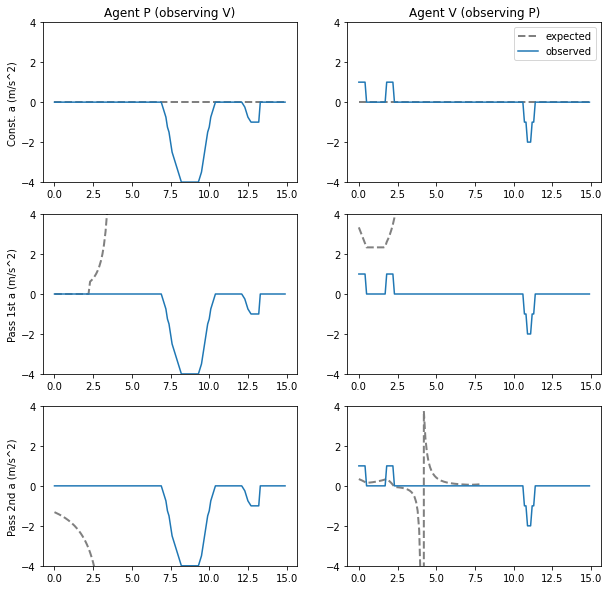

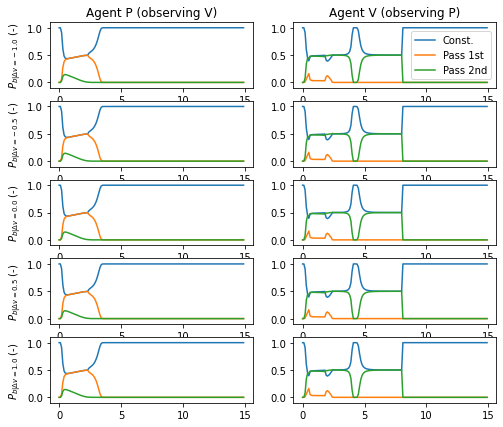

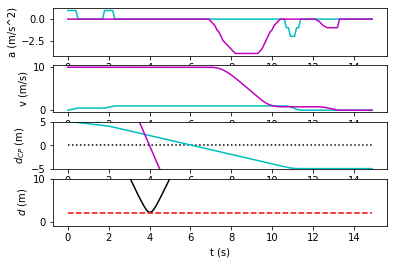

In [10]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = False, oEA = True)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

Text from prev entry: *Now, interestingly, turning on both value based and action observation based behaviour estimation improves the interaction quite considerably.*

And now, combining both action observation based and value based action observation, we now get back the nice original behaviour, even without evidence accumulation.

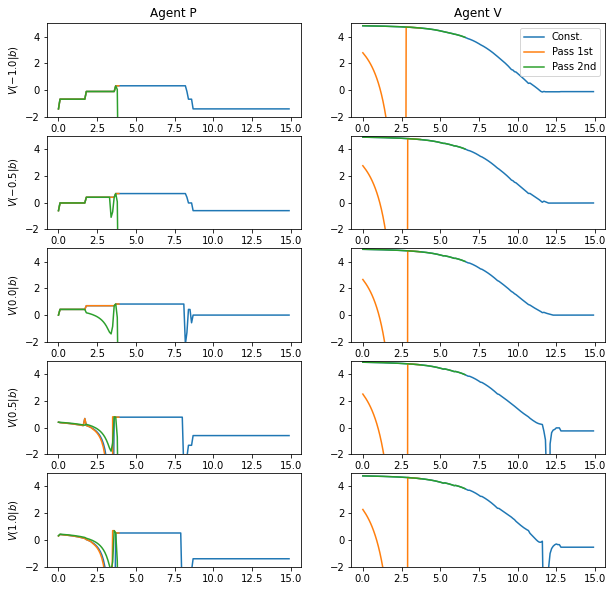

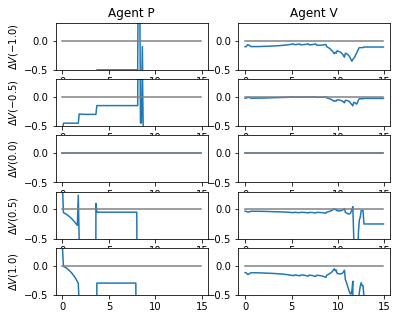

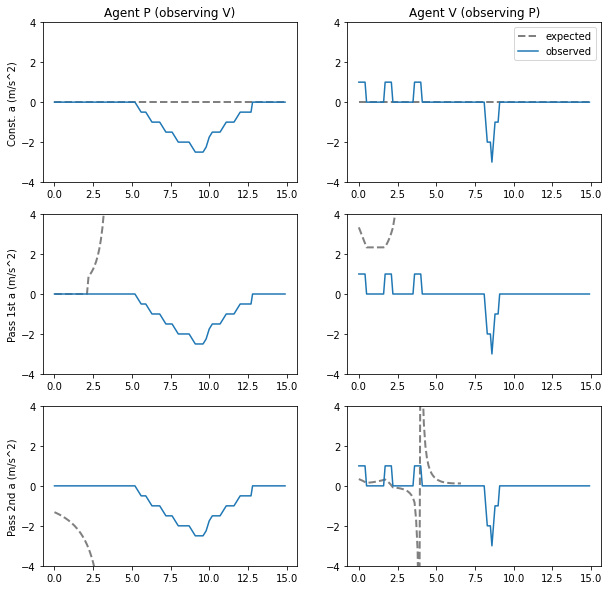

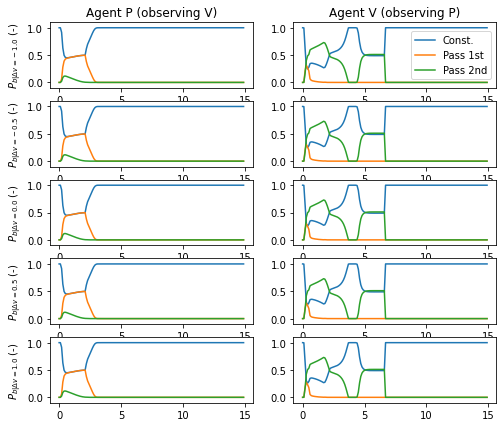

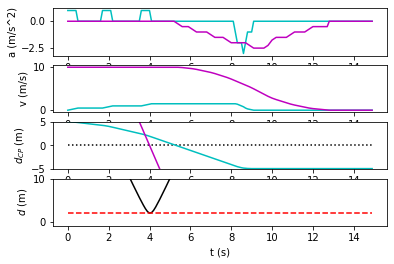

In [11]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = True, oEA = False)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

Text from prev entry: *And turning on also evidence accumulation essentially brings us back to the original smooth behaviour of just the base framework.*

Since we were already sort of back to the original in the previous simulation above, nothing much further happens here.

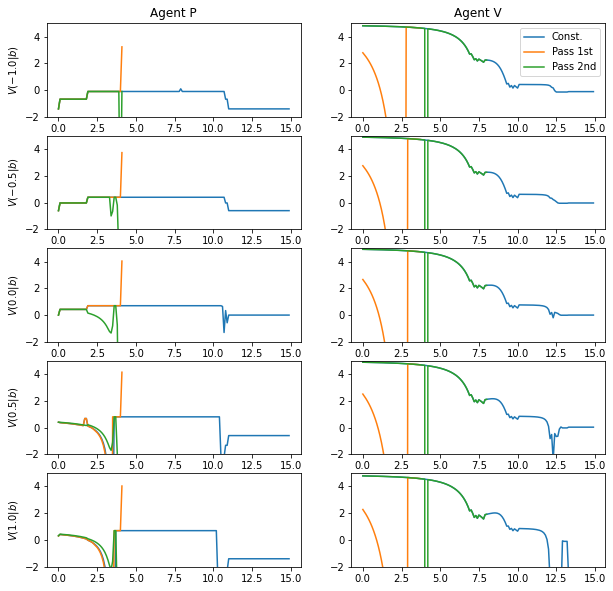

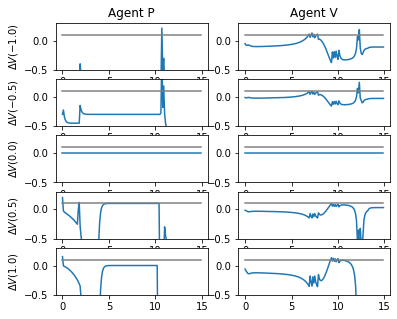

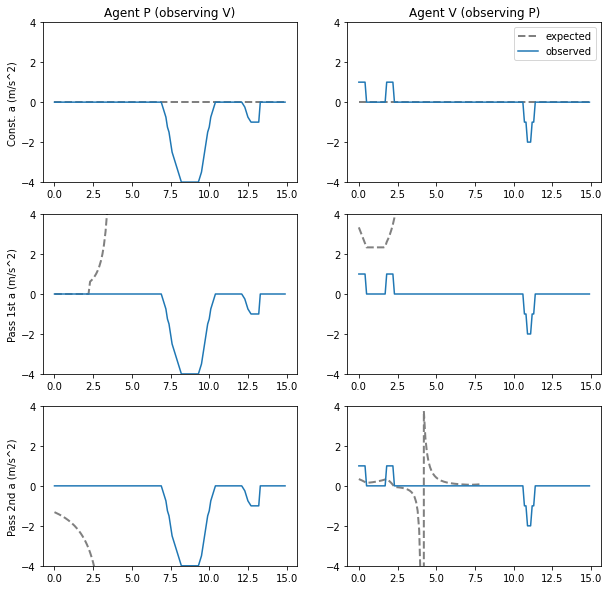

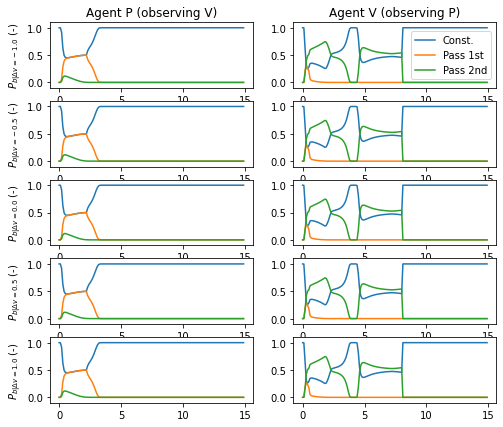

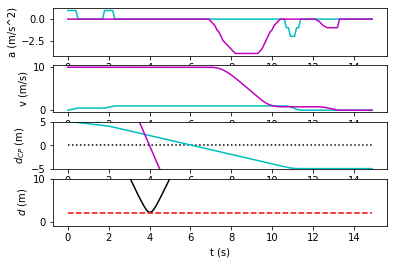

In [12]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = True, oEA = True)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

Text from prev entry: *And really interestingly, now slightly increasing the initial TTA of the vehicle, causes a situation where the vehicle performs what looks like a rather smooth and nice yielding to the pedestrian - from being a bit uncertain about what the pedestrian is up to. And it takes the pedestrian a few seconds to decide that it looks safe to cross in front of the vehicle- It's a quite natural-looking interaction I think.*

This remains nice-looking here.

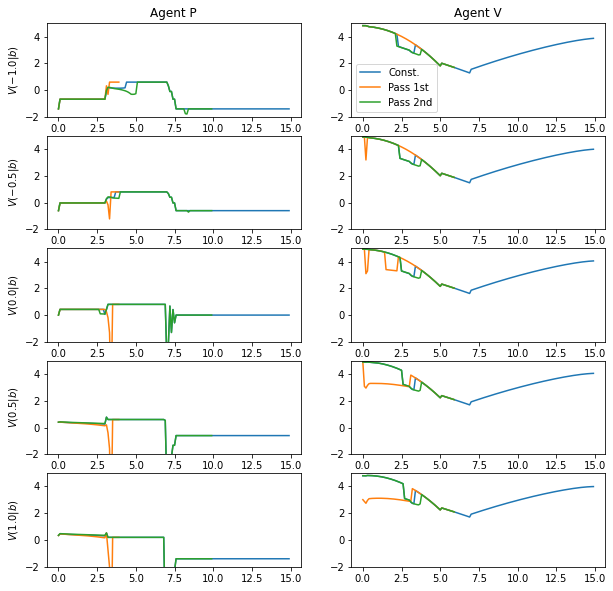

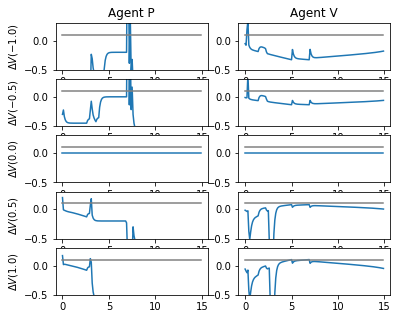

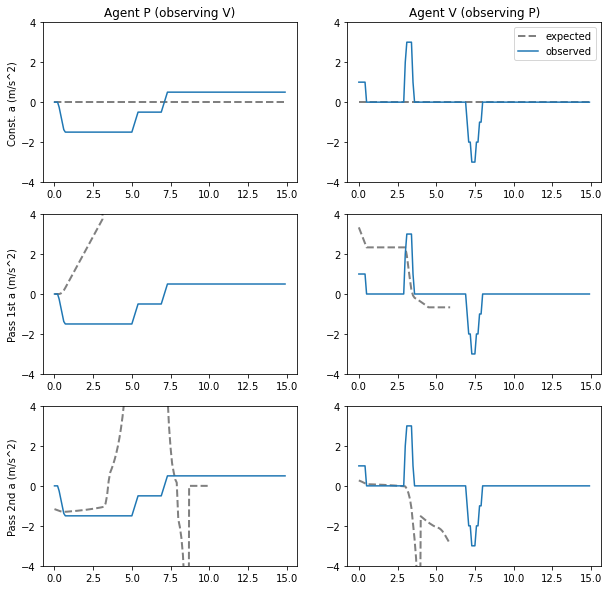

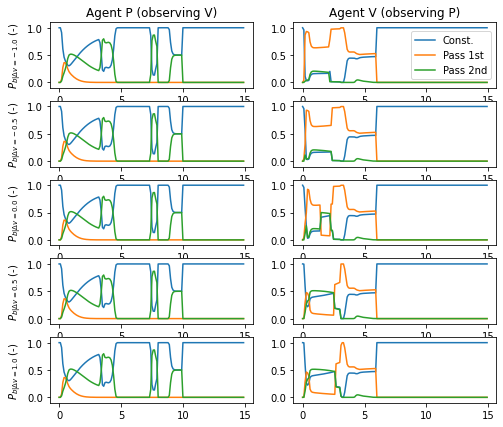

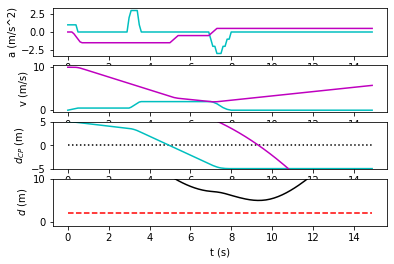

In [13]:
INITIAL_POSITIONS = np.array([[0,-5], [45, 0]])
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

Some overall thoughts here:

* The comment on parameter tuning in the previous post still applies.
* I have not turned off the "constant" behaviour here. I realised now that to do that I need to add some more advanced logic, to keep it in when there is no behaviour estimation, and possibly to reenable it when passing first or second is no longer possible etc. Adding a todo-note.
* I am realising that there is some slight awkwardness arising from the passing first/second calculations in `sc_scenario_helper.py` which are based on conflict space based collision, and the ones in `sc_scenario.py` which use the point-distance definition in `commotions.py`. Should go for conflict space based overall, I think. Adding a todo-note.
* It is interesting to note that the vehicle realises that it can probably push the pedestrian to yield by increasing speed in the simulations above. I *think* the reason it is still not accelerating to make this happen, is because it effectiely doesn't care so much about yielding - the value function isn't sensitive enough to pick up on the difference between the two situations. So the planned v0.2 feature with the affordance-based and waiting-time-dependent value functions could be nice here.